In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath('/Users/jonasvvr/Documents/KULeuven/thesis/Soccer-EPV-Framework/LaurieOnTracking/'))

In [2]:
import data_handler as dh
import visualization as viz
import spatial_features as spf
import game_state_representation as gsr
import soccermap_model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [3]:
%pip install tensorflow-macos
import tensorflow as tf

You should consider upgrading via the '/Users/jonasvvr/.pyenv/versions/3.10.3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
DATA_DIR = '../bru_data/data/comp-4zwgbb66rif2spcoeeol2motx/tmcl-1qtpbdbeudho5i7fu5z2lp2j8'
DATA_DIR_single = '../bru_data/data/comp-4zwgbb66rif2spcoeeol2motx/tmcl-1qtpbdbeudho5i7fu5z2lp2j8/fx-vjeyiqewdovlmmq205890y6s'
FIELD_DIMEN = (108, 72)
SAVE_DIR = '../out/pass_data3.pkl'

event_data_single = dh.read_event_data(DATA_DIR_single)
# event_data = dh.read_dir_event_data(DATA_DIR)

(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

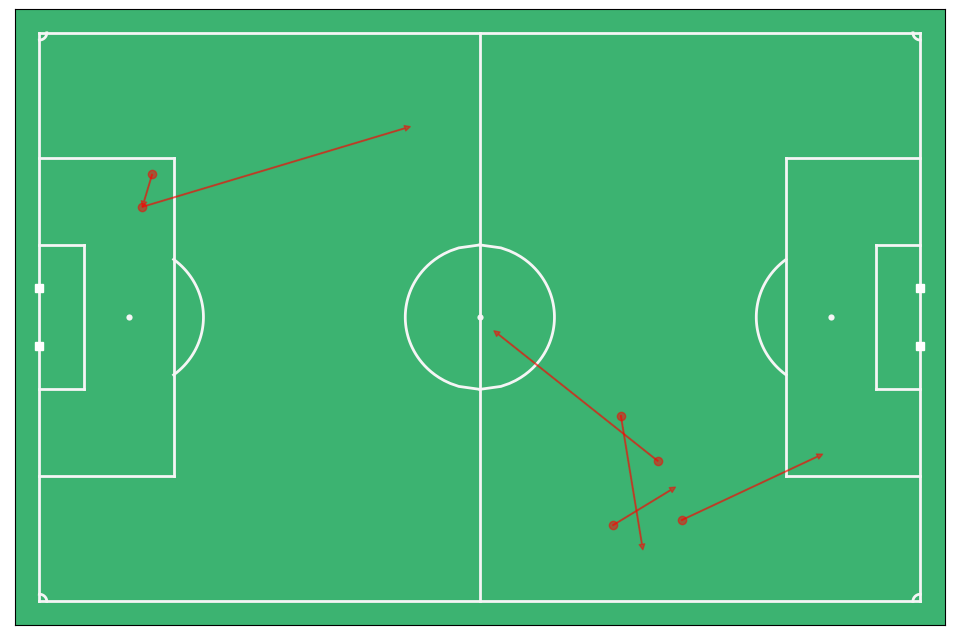

In [5]:
viz.plot_events(event_data_single.iloc[100:110], FIELD_DIMEN)

In [6]:
tracking_single = dh.read_tracking_data(DATA_DIR_single)

(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

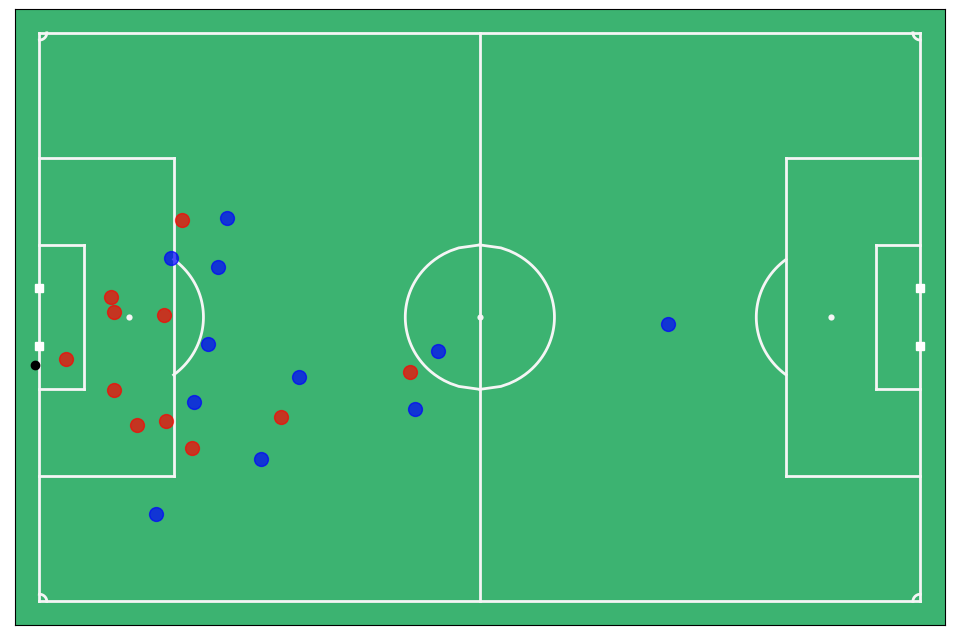

In [7]:
viz.plot_frame(tracking_single.iloc[2316], FIELD_DIMEN)

In [8]:
# passing_events = event_data_single[event_data_single['typeId'] == 1]
# pass_event = passing_events.iloc[119]
#
# match_period = str(pass_event['periodId'])
# timestamp = dh.get_frame(pass_event['timeMin'], pass_event['timeSec'], match_period)
#
# row = tracking_single[(tracking_single['Framecount'] == timestamp) & (tracking_single['Match period'] == match_period)]
# ball_xy = np.array(row['Ball xyz'].iloc[0][:-1])
# ball_carrier = gsr.get_ball_carier(row['Column 5'].iloc[0], ball_xy)
# ball_carrier_xy = np.array([ball_carrier['x'], ball_carrier['y']])
# distance = np.linalg.norm(ball_xy - ball_carrier_xy)
# print(distance)
#
# viz.plot_frame(row.iloc[0], FIELD_DIMEN)

In [9]:
# pass_data = dh.read_event_tracking_data(DATA_DIR, FIELD_DIMEN, SAVE_DIR, num_files=1)
# pass_data.to_pickle(SAVE_DIR, compression='gzip')


In [10]:
pass_data = pd.read_pickle(SAVE_DIR, compression='gzip')
pass_data

,Event start,Event end,Loc attack,Loc defend,vx attack,vx defend,vy attack,vy defend,Distance ball,Distance goal,Angle ball sin,Angle ball cos,Angle goal sin,Angle goal cos,Angle goal rad,Ball carrier sine,Ball carrier cosine,Outcome
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[61.837161965924665, 61.31178190201293, 60.79...","[[113.84199576606166, 113.52973178863765, 113....","[[0.0, 0.8472251690475298, 0.8472251690475298,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.9486832980505138, 0.9486832980505138,...","[[0.0, 0.31622776601683794, 0.3162277660168379...","[[0.0, 1.2490457723982544, 1.2490457723982544,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[70.62049631657936, 69.65338828800793, 68.687...","[[113.84199576606166, 113.52973178863765, 113....","[[0.0, 0.25261787909315153, 0.2526178790931515...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.9486832980505138, 0.9486832980505138,...","[[0.0, 0.31622776601683794, 0.3162277660168379...","[[0.0, 1.2490457723982544, 1.2490457723982544,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[63.326455766922564, 62.43620744407847, 61.54...","[[113.84199576606166, 113.52973178863765, 113....","[[0.0, 0.4522596386163078, 0.4522596386163078,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.9486832980505138, 0.9486832980505138,...","[[0.0, 0.31622776601683794, 0.3162277660168379...","[[0.0, 1.2490457723982544, 1.2490457723982544,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[78.73327187409399, 78.44123979132405, 78.160...","[[113.84199576606166, 113.52973178863765, 113....","[[0.0, 0.9546154784497185, 0.9546154784497185,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.9486832980505138, 0.9486832980505138,...","[[0.0, 0.31622776601683794, 0.3162277660168379...","[[0.0, 1.2490457723982544, 1.2490457723982544,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0

In [11]:
start_passes = pass_data.loc[:, 'Event start']
end_passes = pass_data.loc[:, 'Event end']

In [12]:
pass_data_ = pass_data.drop(['Event start', 'Event end'], axis=1)
Xp = np.asarray(pass_data_.iloc[:, :-1])
Xd = np.asarray(end_passes)
y = pass_data_.iloc[:, -1]

In [13]:
Xp_train, Xp_test, Xd_train, Xd_test, y_train, y_test = train_test_split(Xp, Xd, y, test_size=0.25, stratify=y)

In [14]:
loss = 'binary_crossentropy'
optimizer = 'adam'
epochs = 30

soccermap = soccermap_model.SoccerMap(FIELD_DIMEN)
soccermap.compile(loss, optimizer)

In [15]:
soccermap.model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pass_input (InputLayer)        [(None, 108, 72, 15  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 104, 68, 32)  12032       ['pass_input[0][0]']             
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 112, 76, 32)  0          ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 108, 72, 64)  51264       ['zero_padding2d[0][0]']   

In [16]:
Xp_train = dh.data_to_tensor(Xp_train)
Xp_test = dh.data_to_tensor(Xp_test)
Xd_train = dh.data_to_tensor2(Xd_train)
Xd_test = dh.data_to_tensor2(Xd_test)
y_train = np.asarray(y_train).astype('float32').reshape(-1, 1)
y_test = np.asarray(y_test).astype('float32').reshape(-1, 1)

In [17]:
soccermap.full.fit([Xp_train, Xd_train], y_train,
                   epochs=epochs,
                   validation_data=([Xp_test, Xd_test], y_test))

Epoch 1/30


2022-12-04 21:56:23.748232: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


6/6 [==============================] - 4s 506ms/step - loss: nan - val_loss: nan
Epoch 2/30
6/6 [==============================] - 3s 461ms/step - loss: nan - val_loss: nan
Epoch 3/30
6/6 [==============================] - 3s 461ms/step - loss: nan - val_loss: nan

KeyboardInterrupt: 